# DLProfile Example using Cosmic Tagger Application

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [2]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.vanidl import VaniDL
profile = VaniDL()

In [6]:
#import shutil
#shutil.rmtree('/tmp/temp_analysis')

In [7]:

DATAPATH_INCLUDES = ["/projects/datascience/dhari/datasets/cosmic_tagger/"]
status = profile.Load("/home/dhari/darshan-logs/apps/cosmic_tagger/cosmic_run1_p8.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

[============================================================] 100.0% 322250 of 322250 Parsing DXT File 
[============================================================] 100.0% 46879 of 46879 Parsing Darshan File 
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [8]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5',
 '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_test.h5']


### Collect the summary of the Application

In [9]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	897.00 seconds
Time spent in I/O		:	46.35 seconds
% Time spent in I/O		:	5.17%
Total Data Accessed		:	1.21 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read']
# of files used			:	2
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	8 bytes and 6745 bytes
	Average			:	4177 bytes
	Median			:	2531 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	93 B/s and 64 MB/s
	Average			:	10 MB/s
	Median			:	6 MB/s
Access Pattern:
	Sequential		:	95.69%
	Consecutive		:	88.27%


Files Summary:
File Types			:	['h5']
Dataset Size:
	Total			:	32.995 GB
	Min,Max			:	4.801 GB and 28.194 GB
	Average			:	16.497 GB


In [10]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 897.0 seconds'


In [11]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()))

'Time spent by application on I/O: 46.34532499983228 seconds'


### I/O time spent on each file

In [12]:
for file in df['Filename'].unique():
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5: 44.19 seconds
I/O time for file /projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_test.h5: 2.15 seconds


### I/O Time spent per rank

In [13]:
for rank in df['Rank'].unique():
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 69.12 seconds
I/O time for rank 1: 44.38 seconds
I/O time for rank 2: 44.52 seconds
I/O time for rank 3: 43.56 seconds
I/O time for rank 4: 41.54 seconds
I/O time for rank 5: 41.20 seconds
I/O time for rank 6: 43.59 seconds
I/O time for rank 7: 42.84 seconds


In [14]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 1.21 GB'

### I/O performed on each file

In [15]:
for file in df['Filename'].unique():
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5: 1200.85 MB
I/O performed on file /projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_test.h5: 38.05 MB


In [16]:
for rank in df['Rank'].unique():
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 162.21 MB
I/O performed by rank 1: 155.88 MB
I/O performed by rank 2: 156.68 MB
I/O performed by rank 3: 153.99 MB
I/O performed by rank 4: 151.35 MB
I/O performed by rank 5: 152.29 MB
I/O performed by rank 6: 154.37 MB
I/O performed by rank 7: 152.11 MB


In [17]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'cosmic_tagging_test': 5155110775.0, 'cosmic_tagging_train': 30272777678.0}


### How application access data over time.

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/cosmic_run1_p8_tm_df.csv


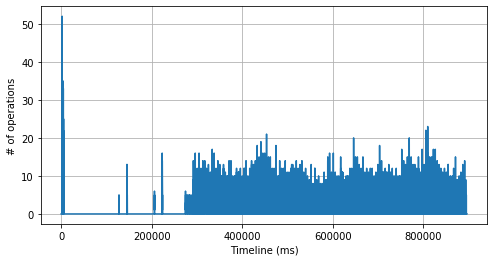

In [18]:
tl = profile.CreateIOTimeline()
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("# of operations")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['operation_count']);

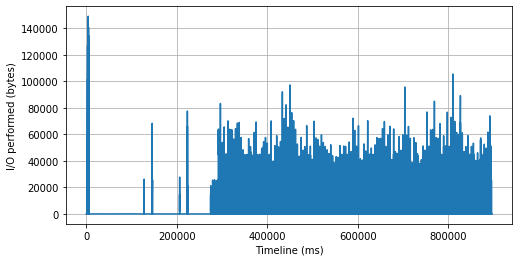

In [19]:
plt.figure(figsize=(8,4))
plt.grid()
plt.ylabel("I/O performed (bytes)")
plt.xlabel("Timeline (ms)")
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

[============================================================] 100.0% 301135 of 301135 Creating Timeline 


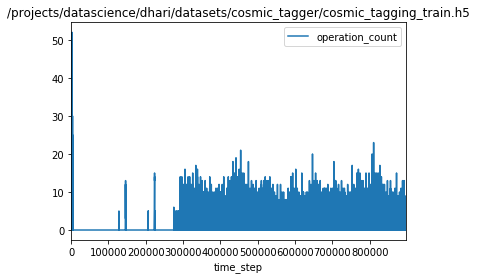

[============================================================] 100.0% 9885 of 9885 Creating Timeline 


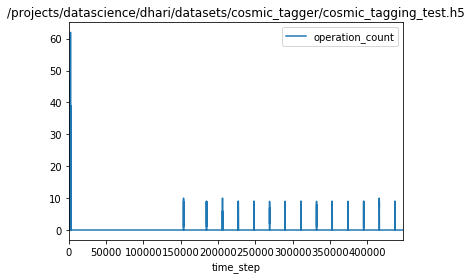

In [20]:
for file in df['Filename'].unique():
    tl = profile.CreateIOTimeline(filepath=file)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 40714 of 40714 Creating Timeline 


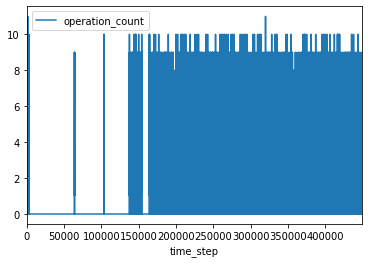

[============================================================] 100.0% 39118 of 39118 Creating Timeline 


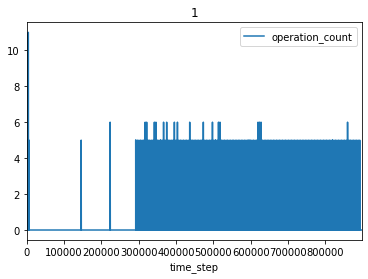

[============================================================] 100.0% 39299 of 39299 Creating Timeline 


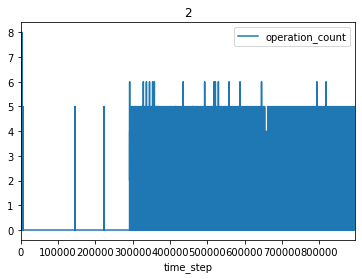

[============================================================] 100.0% 38682 of 38682 Creating Timeline 


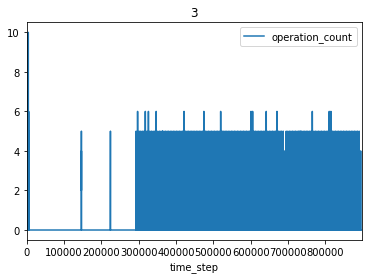

[============================================================] 100.0% 38010 of 38010 Creating Timeline 


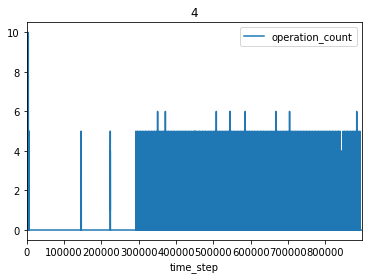

[============================================================] 100.0% 38243 of 38243 Creating Timeline 


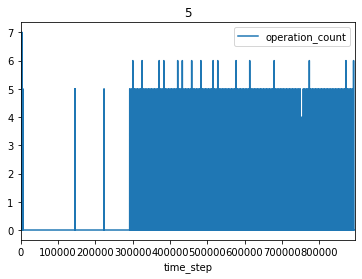

[============================================================] 100.0% 38774 of 38774 Creating Timeline 


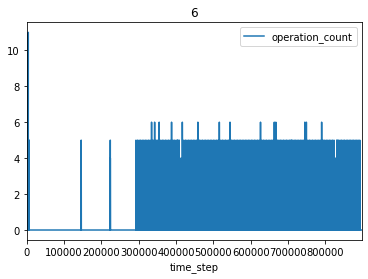

[============================================================] 100.0% 38180 of 38180 Creating Timeline 


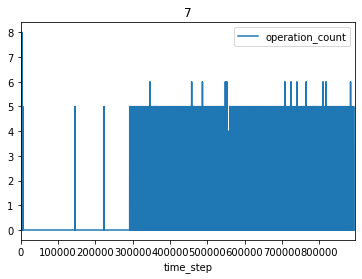

In [21]:
for rank in df['Rank'].unique():
    tl = profile.CreateIOTimeline(rank=rank)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

Text(0.5, 0, 'Transfer Size (bytes)')

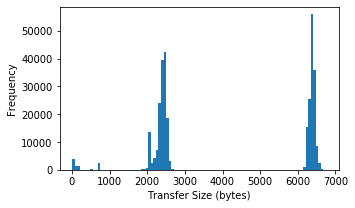

In [22]:
request_df = profile.GetIORequestDistribution()
df['Length'].plot(kind='hist', figsize=(5, 3), bins=100);
plt.xlabel("Transfer Size (bytes)")

### Data Transfer Size distribution for each file.

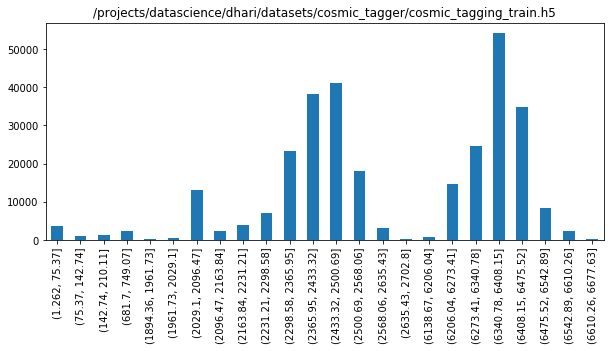

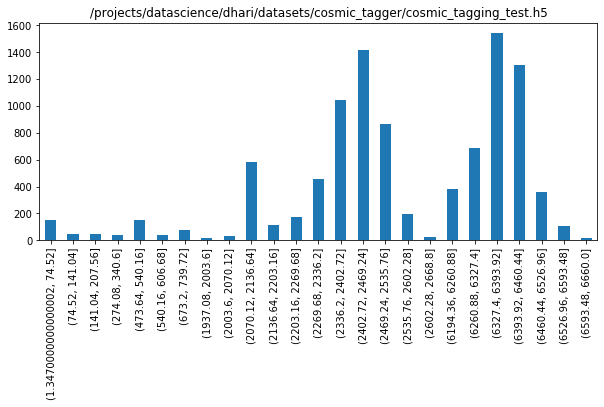

In [23]:
for file in df['Filename'].unique():
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)
    plt.show()

### Data Transfer Sizes per Rank

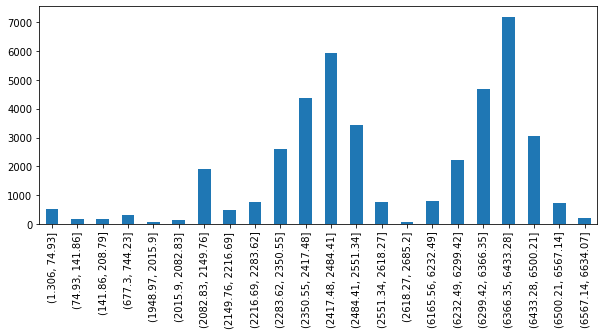

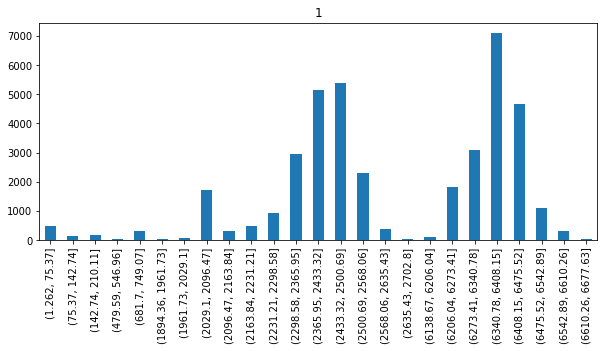

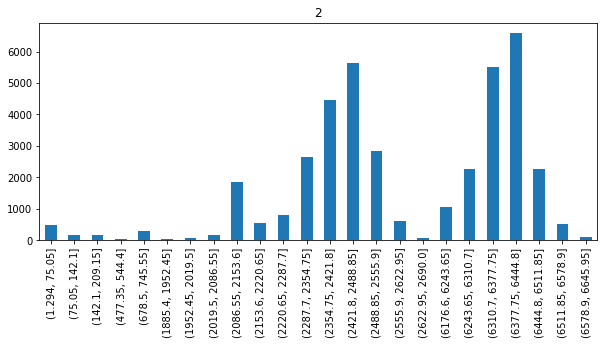

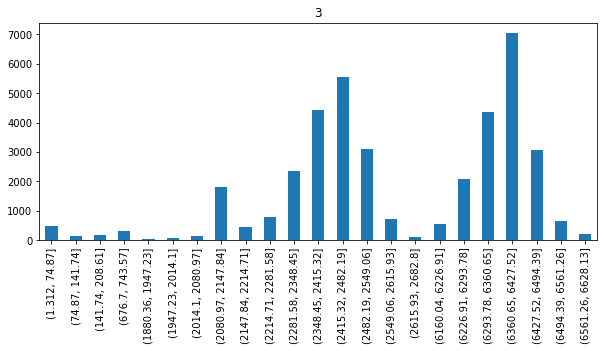

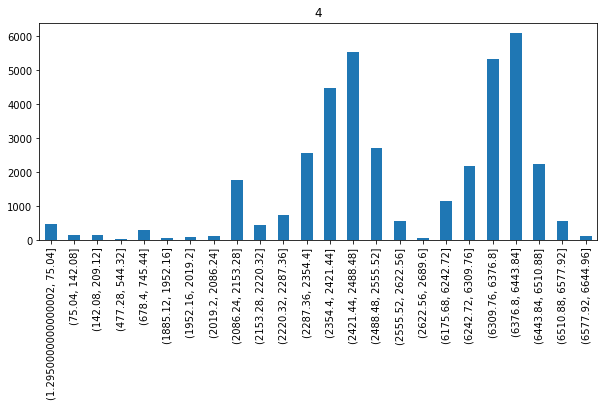

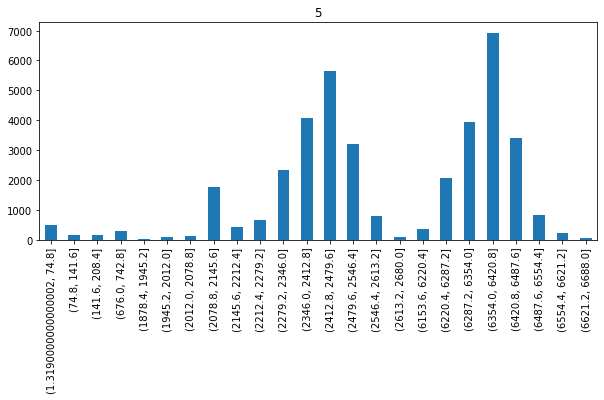

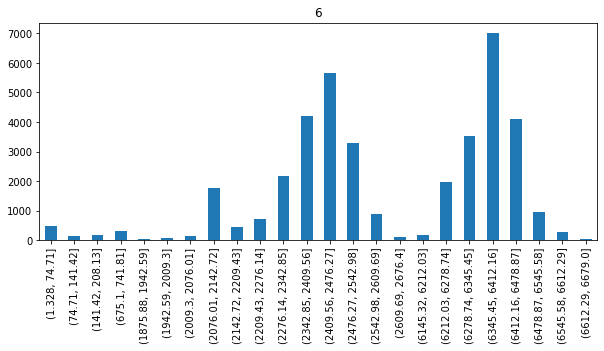

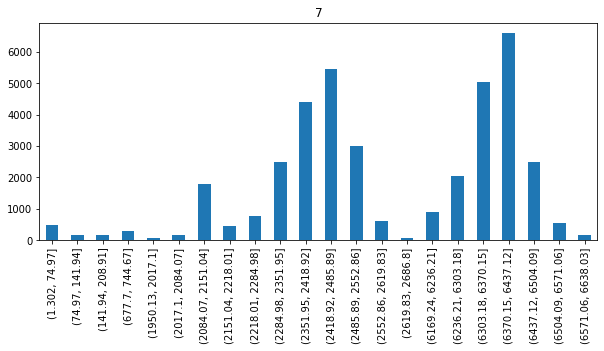

In [24]:
for rank in df['Rank'].unique():
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [25]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique():
    pp.pprint(profile.GetFileSummary(file,ext='h5'))

{'ext': 'h5',
 'filename': 'cosmic_tagging_train',
 'io_size': 1259184741,
 'io_time': 44.19296249987043,
 'path': '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5',
 'size': 30272777678,
 'special': {'keys': [{'keys': [{'keys': [{'name': 'cluster_extents',
                                           'obj': <HDF5 dataset "cluster_extents": shape (129225,), type "|V16">,
                                           'shape': (129225,),
                                           'size': 129225,
                                           'type': 'dataset'},
                                          {'name': 'extents',
                                           'obj': <HDF5 dataset "extents": shape (43075,), type "|V16">,
                                           'shape': (43075,),
                                           'size': 43075,
                                           'type': 'dataset'},
                                          {'name': 'image_meta',
 

{'ext': 'h5',
 'filename': 'cosmic_tagging_test',
 'io_size': 39899372,
 'io_time': 2.1523624999997164,
 'path': '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_test.h5',
 'size': 5155110775,
 'special': {'keys': [{'keys': [{'keys': [{'name': 'cluster_extents',
                                           'obj': <HDF5 dataset "cluster_extents": shape (22086,), type "|V16">,
                                           'shape': (22086,),
                                           'size': 22086,
                                           'type': 'dataset'},
                                          {'name': 'extents',
                                           'obj': <HDF5 dataset "extents": shape (7362,), type "|V16">,
                                           'shape': (7362,),
                                           'size': 7362,
                                           'type': 'dataset'},
                                          {'name': 'image_meta',
           

In [27]:
profile.CreateChromeTimeline(location="/home/dhari/timeline/apps/cosmic_tagger", filename="cosmic_run1_p8.json")

[============================================================] 100.0% 311020 of 311020 Creating Timeline 


{'traceEvents': [{'name': '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5',
   'cat': 'X_POSIX',
   'ph': 'B',
   'ts': 2331100,
   'pid': 7,
   'tid': 0,
   'args': {'Module': 'X_POSIX',
    'Filename': '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5',
    'Rank': 7,
    'Operation': 'read',
    'Segment': 0,
    'Offset': 0,
    'Length': 8,
    'Start': 2.3311,
    'End': 2.34}},
  {'name': '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5',
   'cat': 'X_POSIX',
   'ph': 'B',
   'ts': 2331200,
   'pid': 0,
   'tid': 0,
   'args': {'Module': 'X_POSIX',
    'Filename': '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5',
    'Rank': 0,
    'Operation': 'read',
    'Segment': 0,
    'Offset': 0,
    'Length': 8,
    'Start': 2.3312,
    'End': 2.3405}},
  {'name': '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5',
   'cat': 'X_POSIX',
   'ph': 'B',
   't